In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense ,Flatten ,Conv2D, MaxPooling2D
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = x_train.reshape(-1,28,28,1)/255
x_test = x_test.reshape(-1,28,28,1)/255

In [4]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','coat','sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [7]:
history = model.fit(x_train,y_train,epochs = 5, validation_data = (x_test,y_test),verbose = 1)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.7745 - loss: 0.6246 - val_accuracy: 0.8766 - val_loss: 0.3414
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.8881 - loss: 0.3058 - val_accuracy: 0.8913 - val_loss: 0.2995
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9053 - loss: 0.2540 - val_accuracy: 0.8998 - val_loss: 0.2723
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9196 - loss: 0.2169 - val_accuracy: 0.9018 - val_loss: 0.2746
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9282 - loss: 0.1945 - val_accuracy: 0.9092 - val_loss: 0.2547


In [8]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"{test_acc*100:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9106 - loss: 0.2577
90.92


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


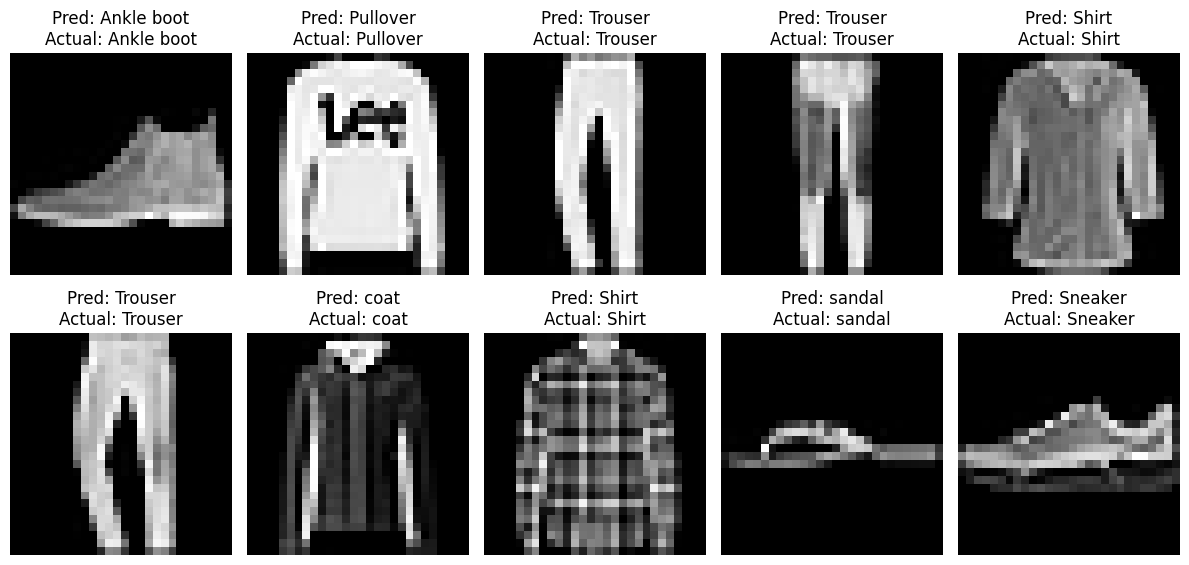

In [10]:
prediction = model.predict(x_test[:10])
pred_labels = np.argmax(prediction, axis=1)
actual = y_test[:10]

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')

    pred_name = class_name[pred_labels[i]]
    actual_name = class_name[actual[i]]

    plt.title(f"Pred: {pred_name}\nActual: {actual_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.89      0.86      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.86      0.87      0.87      1000
       Dress       0.91      0.91      0.91      1000
        coat       0.88      0.86      0.87      1000
      sandal       0.98      0.97      0.98      1000
       Shirt       0.76      0.70      0.73      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.95      0.98      0.97      1000
  Ankle boot       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



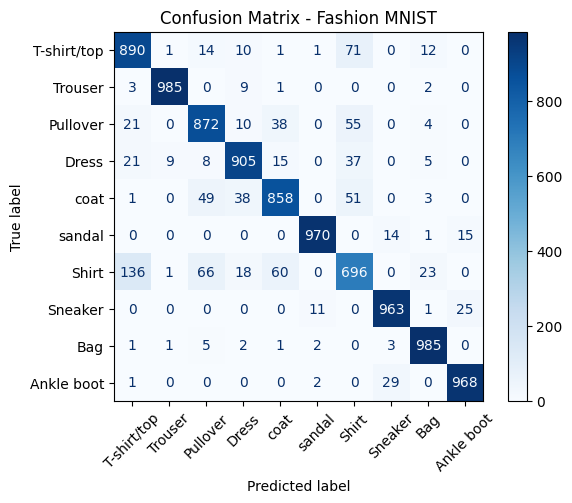

In [11]:
y_true = y_test
y_pred = np.argmax(model.predict(x_test), axis=1)

print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_name))

cm = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm, display_labels=class_name).plot(
    cmap='Blues', values_format='d', xticks_rotation=45
)
plt.title("Confusion Matrix - Fashion MNIST")
plt.show()